## Regression Example

Dado un dataset predecir el valor que relaciona las entradas y las salidas de una distribución $P(z)$ desconocida utilizando Redes Neuronales Artificiales y Redes Neuronales Convolucionales para mapear $\textbf{X} \rightarrow y: y=f(\textbf{x})$

## Boston Housing Problem

Se desea predecir la el valor medio de las casas de un suburbio de Boston. El dataset tiene pocos datos, aproximadamente 506: 404 para training y 102 para testing. Utilice K-Fold y Redes Neuronales Convolucionales para resolver este problema

In [20]:
from tensorflow.keras.datasets  import boston_housing
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()
print('Shape de X_train: ',x_train.shape)
print('Shape de X_test:', x_test.shape)


Shape de X_train:  (404, 13)
Shape de X_test: (102, 13)


Veamos aleatoriamente el contenido de uno de los **samples** de $x\_train$

In [21]:
import numpy as np
sample = np.random.randint(0, len(x_train))
print('x[{}] = {}'.format(sample, x_train[sample, :]))
print('y[{}] = {}'.format(sample, y_train[sample]))

x[21] = [2.7630e-02 7.5000e+01 2.9500e+00 0.0000e+00 4.2800e-01 6.5950e+00
 2.1800e+01 5.4011e+00 3.0000e+00 2.5200e+02 1.8300e+01 3.9563e+02
 4.3200e+00]
y[21] = 30.8


### Preparación de datos
Es necesario hacer un escalado de los datos

In [22]:
mean = x_train.mean(axis=0)
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [23]:
std = x_train.std(axis=0)
std

array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
       1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
       8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
       7.24556085e+00])

In [24]:
x_train-=mean
x_train/=std
x_test-=mean
x_test/=std
print('x[{}] = {}'.format(sample, x_train[sample, :]))

x[21] = [-0.40279158  2.67583877 -1.19867463 -0.25683275 -1.104211    0.46256782
 -1.69177009  0.81907028 -0.74135579 -0.92615935 -0.08008079  0.43456572
 -1.16220359]


### Modelo de ConvNet
Usar Mean Square Error para *loss function*

Monitorear con Mean Absolute Error: donde un error en mae de 0.5 implica un error de $500.00 USD

In [25]:
from tensorflow.keras import models
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop

def crear_modelo():
    model = models.Sequential()
    model.add(Dense(64, activation='relu', input_shape=(x_train.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=RMSprop(learning_rate=0.1), loss='mse', metrics=['mae'])
    return model

modelo = crear_modelo()
modelo.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_22 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


### K-Fold Cross Validation - P1

En esta parte vamos a codificar el Cross validation

In [26]:
k=4
num_val_samples = len(x_train)//k
num_val_samples

101

In [53]:
num_epochs = 200
all_scores = []
history_arr = []
mae_total = []

Esto significa que vamos a validar en 101 ejemplos y entrenar en $404 - 101 = 303$, 4 veces

In [54]:
for i in range(k):
    print('Procesando fold: {}'.format(i))
    # Generando el conjunto de datos de validacion
    x_val_i = x_train[i*num_val_samples:(i+1)*num_val_samples]
    y_val_i = y_train[i*num_val_samples:(i+1)*num_val_samples]
    
    # Generando el resto de ejemplos para entrenar
    x_train_i = np.concatenate((x_train[:i*num_val_samples], x_train[(i+1)*num_val_samples:]), axis=0)
    y_train_i = np.concatenate((y_train[:i*num_val_samples], y_train[(i+1)*num_val_samples:]), axis=0)
    
    model_i = crear_modelo()
    print('Entrenando...')
    history = model_i.fit(x_train_i, y_train_i, epochs=num_epochs, batch_size=1, verbose=1)
    history_arr.append(history)
    mae_total.append(history.history['mae'])
    print('Validando')
    val_mse, val_mae = model_i.evaluate(x_val_i, y_val_i, verbose=1)
    all_scores.append(val_mae)
    

Procesando fold: 0
Entrenando...
Epoch 1/200
303/303 [==============================] - 1s 2ms/step - loss: 678.2192 - mae: 16.9066
Epoch 2/200
303/303 [==============================] - 1s 2ms/step - loss: 168.9313 - mae: 8.8927
Epoch 3/200
303/303 [==============================] - 1s 2ms/step - loss: 90.2443 - mae: 5.9207
Epoch 4/200
303/303 [==============================] - 1s 2ms/step - loss: 57.7484 - mae: 4.9768
Epoch 5/200
303/303 [==============================] - 1s 2ms/step - loss: 69.6654 - mae: 5.2908
Epoch 6/200
303/303 [==============================] - 1s 2ms/step - loss: 42.4775 - mae: 4.2896
Epoch 7/200
303/303 [==============================] - 1s 2ms/step - loss: 65.4094 - mae: 4.5463
Epoch 8/200
303/303 [==============================] - 1s 2ms/step - loss: 61.9616 - mae: 4.9423
Epoch 9/200
303/303 [==============================] - 1s 2ms/step - loss: 33.3880 - mae: 4.0862
Epoch 10/200
303/303 [==============================] - 1s 2ms/step - loss: 59.7253 - mae: 

Revisando el History

In [55]:
history_arr[0].history.keys()

dict_keys(['loss', 'mae'])

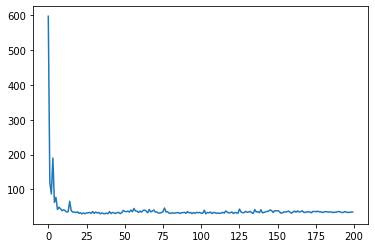

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history_arr[3].history['loss'])


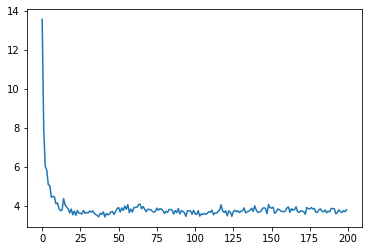

In [57]:
plt.plot(history_arr[3].history['mae'])

Obtengamos el valor medio del Mean Absolute Error calculado para cada época

In [64]:
np.mean([np.mean(history_arr[i].history['mae']) for i in range(k)])

3.811934933364391

Evaluación del modelo en datos de testeo

In [58]:
model_i.evaluate(x_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 60.0036 - mae: 5.6969


[60.00361251831055, 5.696869373321533]